In [2]:

import os
import datetime
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


In [3]:
data  = pd.read_csv("trained_models/xgboost/accuracy_vs_Nfeatures.dat", sep =' ')

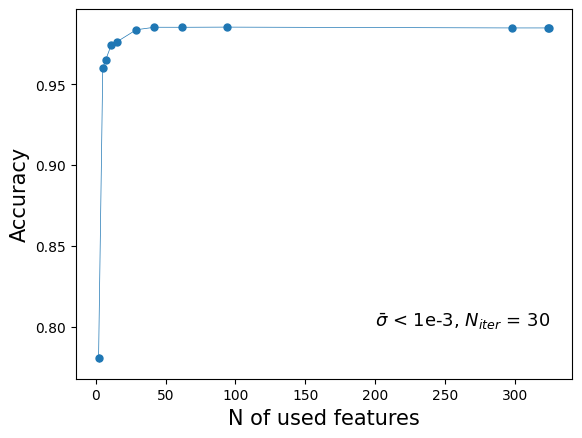

In [7]:
fig, ax = plt.subplots()
ax.errorbar(data["N"], data["accuracy"], data["std"], marker = 'o', markersize = 5, lw = 0.5)
ax.text(200, 0.8, r"$\bar{\sigma}$ < 1e-3, $N_{iter}$ = 30", fontsize = 13)
ax.set_xlabel("N of used features", fontsize = 15)
ax.set_ylabel("Accuracy", fontsize = 15)
plt.savefig("plot_general/features_importance.png", bbox_inches = "tight")

In [6]:
data

,N,accuracy,std
0,2,0.780454,0.002305
1,5,0.959904,0.001279
2,7,0.964888,0.001160
3,11,0.974127,0.001029
4,15,0.976203,0.000964
5,29,0.983728,0.000705
6,42,0.985290,0.000683
7,62,0.985268,0.000680
8,94,0.985367,0.000740
9,298,0.984858,0.000769


In [22]:
hidden_sizes = [int(i) for i in ast.literal_eval(config.get("MODEL", "hidden_sizes"))]
latent_size = int(config.get("MODEL", "latent_size"))
batch_size = int(config.get("TRAINING", "batch_size"))
N_epochs = int(config.get("TRAINING", "N_epochs"))
validation_size = float(config.get("SAMPLE", "validation_size"))
test_size = float(config.get("SAMPLE", "test_size"))
shuffle_random_state = int(config.get("SAMPLE", "shuffle_random_state"))
split_random_state_1 = int(config.get("SAMPLE", "split_random_state_1"))
split_random_state_2 = int(config.get("SAMPLE", "split_random_state_2"))







In [22]:
data

,N,accuracy,std
0,2,0.780454,0.002305
1,5,0.959904,0.001279
2,7,0.964888,0.001160
3,11,0.974127,0.001029
4,15,0.976203,0.000964
5,29,0.983728,0.000705
6,42,0.985290,0.000683
7,62,0.985268,0.000680
8,94,0.985367,0.000740
9,298,0.984858,0.000769


In [12]:
len(train.dataloader)

502

In [41]:
class autoencoder(nn.Module):
    def __init__(self, encoder, decoder):
        super(autoencoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [42]:
def train_routine(dataloader, modello, loss_function, optimizer):
    
    num_batches = len(dataloader)
    for batch, (features, _) in enumerate(dataloader):
        output = modello(features)
        loss = loss_function(output, features)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch == round(num_batches/2):
            loss_train = loss.item()
    return loss_train

In [43]:
def test_routine(dataloader, modello, loss_function):
    num_batches = len(dataloader)
    loss = 0
    for batch, (features, _) in enumerate(dataloader):
        with torch.no_grad():
            output = modello(features)
            loss += loss_function(output, features)
    loss /= num_batches
    print(f"Avg test loss = {loss}") 
    return loss


In [24]:
my_encoder = ulb.general_dense(input_size=3, output_size = 1, N_hidden=1, hidden_sizes = [2])
my_decoder = ulb.general_dense(input_size=1, output_size = 3, N_hidden=1, hidden_sizes = [2])

In [25]:
x = torch.rand(10000)
y = x*3
z = y*1.2
train = torch.stack((x,y,z), dim = 1)
x = torch.rand(1000)
y = x*3
z = y*1.2
test= torch.stack((x,y,z), dim = 1)

In [32]:
batch_size = 100
train_dataset = TensorDataset(train, torch.rand(train.shape[0]))
test_dataset = TensorDataset(test, torch.rand(test.shape[0]))

train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [36]:
my_autoencoder = autoencoder(my_encoder, my_decoder)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(my_autoencoder.parameters(), lr = 0.0001)

In [37]:
test_losses = []
train_losses = []
for i in range(1000):
    train_losses.append(train_routine(train_dataloader, my_autoencoder,loss_function, optimizer))
    test_losses.append(test_routine(test_dataloader, my_autoencoder,loss_function))

Avg test loss = 0.00019221057300455868
Avg test loss = 0.0001832369016483426
Avg test loss = 0.00017476190987508744
Avg test loss = 0.00016671759658493102
Avg test loss = 0.0001590602332726121
Avg test loss = 0.00015177350724115968
Avg test loss = 0.00014479183300863951
Avg test loss = 0.00013800930173601955
Avg test loss = 0.00013152521569281816
Avg test loss = 0.00012536707799881697
Avg test loss = 0.00011955043009947985
Avg test loss = 0.00011405195255065337
Avg test loss = 0.00010882508649956435
Avg test loss = 0.00010385385394329205
Avg test loss = 9.910698281601071e-05
Avg test loss = 9.459168359171599e-05
Avg test loss = 9.029728971654549e-05
Avg test loss = 8.613287354819477e-05
Avg test loss = 8.213202090701088e-05
Avg test loss = 7.831132097635418e-05
Avg test loss = 7.466603710781783e-05
Avg test loss = 7.114501931937411e-05
Avg test loss = 6.777322414563969e-05
Avg test loss = 6.451914669014513e-05
Avg test loss = 6.138857861515135e-05
Avg test loss = 5.83507826377172e-05
A

KeyboardInterrupt: 

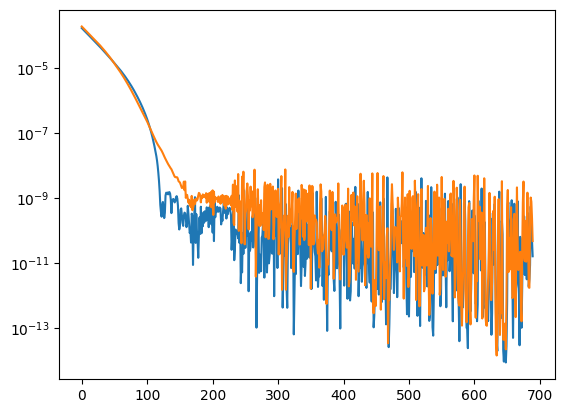

In [39]:
fig, ax = plt.subplots()
ax.plot(np.arange(0,len(train_losses)), train_losses)
ax.plot(np.arange(0,len(test_losses)), test_losses)
ax.set_yscale('log')

In [60]:
x = [10, 45, 50, 60]

with open("blablabla.dat", "w") as f:
    f.write("Hidden layers encoder = "+" ".join(map(str,x)))
f.close()

In [61]:
with open("blablabla.dat", "r") as f:
    k = f.read().split(" ")

In [52]:
x =map(str, x)

In [62]:
k

['Hidden', 'layers', 'encoder', '=', '10', '45', '50', '60']

In [55]:
y

'23,45,50,60'

In [40]:
class autoencoder(nn.Module):
    def __init__(self, encoder, decoder):
        super(autoencoder, self).__init__()

        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



In [41]:
my_autoencoder = autoencoder(my_encoder, my_decoder)

In [42]:
summary(my_autoencoder, (1,325))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 250]          81,500
         LeakyReLU-2               [-1, 1, 250]               0
            Linear-3               [-1, 1, 150]          37,650
         LeakyReLU-4               [-1, 1, 150]               0
            Linear-5                [-1, 1, 60]           9,060
         LeakyReLU-6                [-1, 1, 60]               0
     general_dense-7                [-1, 1, 60]               0
            Linear-8               [-1, 1, 150]           9,150
         LeakyReLU-9               [-1, 1, 150]               0
           Linear-10               [-1, 1, 250]          37,750
        LeakyReLU-11               [-1, 1, 250]               0
           Linear-12               [-1, 1, 325]          81,575
        LeakyReLU-13               [-1, 1, 325]               0
    general_dense-14               [-1,

In [91]:
def train_routine(dataloader, model, loss_fn, optimizer, verbose = True):
    losses = []
    num_batches = len(dataloader)
    for batch, (features, _) in enumerate(dataloader): 
        output = model(features)
        loss = loss_fn(output, features)

        # Backpropagation
        optimizer.zero_grad()    # Clear the gradient
        loss.backward()          # Compute the gradient (??)
        optimizer.step()         # update model weights

        
        if batch == round(num_batches/2):
            losses.append(loss.item())
            if verbose:
                print(f"loss: {loss:>7f}")

    return losses

def test_routine(dataloader, model, loss_fn, verbose = True):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0
    model.eval() 
    with torch.no_grad():
        for features, _ in dataloader:
            output = model(features)
            test_loss += loss_fn(output, features).item()

    test_loss /= num_batches
    if verbose:
        print(f" Avg test loss      : {test_loss:>8f}")

    return test_loss

In [92]:
X_train_t, y_train_t = dcl.transform2tensor(train.X, train.y)
X_test_t, y_test_t = dcl.transform2tensor(validation.X, validation.y)

In [93]:
batch_size = 40
train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset = TensorDataset(X_test_t, y_test_t)
train_dataloader = DataLoader(train_dataset, batch_size= batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size= batch_size, shuffle=True)

In [96]:
my_autoencoder = autoencoder(my_encoder, my_decoder)
EPOCHS = 20
SEED = 12
loss_fn = torch.nn.MSELoss()  #torch.nn.CrossEntropyLoss
optimizer = torch.optim.Adam(my_autoencoder.parameters(), lr=0.01, weight_decay=0.01)

In [97]:
train_loss = []
test_loss  = []
for t in range(EPOCHS):
    print(f"Epoch {t+1}---------------------")
    train_loss.append(train_routine(train_dataloader, my_autoencoder, loss_fn, optimizer, verbose = False))
    test_loss.append(test_routine(test_dataloader, my_autoencoder, loss_fn, verbose = True))
print("Done!")

Epoch 1---------------------
 Avg test loss      : 0.994202
Epoch 2---------------------
 Avg test loss      : 0.994158
Epoch 3---------------------
 Avg test loss      : 0.994162
Epoch 4---------------------
 Avg test loss      : 0.994223
Epoch 5---------------------
 Avg test loss      : 0.994175
Epoch 6---------------------
 Avg test loss      : 0.994147
Epoch 7---------------------
 Avg test loss      : 0.994142
Epoch 8---------------------
 Avg test loss      : 0.994158
Epoch 9---------------------
 Avg test loss      : 0.994182
Epoch 10---------------------
 Avg test loss      : 0.994359
Epoch 11---------------------
 Avg test loss      : 0.994225
Epoch 12---------------------
 Avg test loss      : 0.994462
Epoch 13---------------------
 Avg test loss      : 0.994166
Epoch 14---------------------
 Avg test loss      : 0.994190
Epoch 15---------------------
 Avg test loss      : 0.994164
Epoch 16---------------------
 Avg test loss      : 0.994187
Epoch 17---------------------
 Av

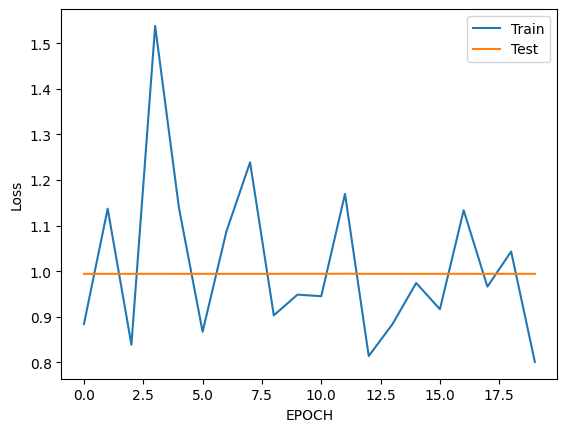

In [98]:
fig, ax = plt.subplots()
ax.plot(np.arange(EPOCHS), train_loss, label ='Train')
ax.plot(np.arange(EPOCHS), test_loss, label ='Test')
ax.set_xlabel("EPOCH")
ax.set_ylabel("Loss")
ax.legend()
        

In [121]:
class sample_container():
    def __init__(self, X, y, objectID):
        self.X = X
        self.y = y
        self.objectID = objectID
        return None
    def get_tensors(self, one_hot = False):
        self.X_t, self.y_t = dcl.transform2tensor(self.X, self.y, one_hot = one_hot)

    def god_game(self):
        if not hasattr(self, "X_t"):
            self.get_tensors()
        

In [100]:
my_autoencoder = autoencoder(my_encoder, my_decoder)

In [102]:
import datetime


In [109]:
x =datetime.date.today()

In [11]:
print(datetime.date.today())

2024-03-11


In [118]:
x = [2,4,5,6]
y = x[::-1]

In [119]:
y

[6, 5, 4, 2]